In [22]:
import io
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from google.colab import files
upload=files.upload()



Saving stress_classification.csv to stress_classification (3).csv


In [5]:
df = pd.read_csv('stress_classification.csv',sep=';', index_col=[0])

In [6]:
df.head()

,respiration_rate,body_temperature,limb_movement_rate,blood_oxygen_levels,rapid_eye_movement,hour_of_sleep,heart_rate,stress_level
snoring_range,,,,,,,,
93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [7]:
missing_values = df.isnull()
missing_values_count = missing_values.sum()
print(missing_values_count)

respiration_rate       0
body_temperature       0
limb_movement_rate     0
blood_oxygen_levels    0
rapid_eye_movement     0
hour_of_sleep          0
heart_rate             0
stress_level           0
dtype: int64


In [8]:
#The results show us that there are no missing values in the dataset.

<Axes: >

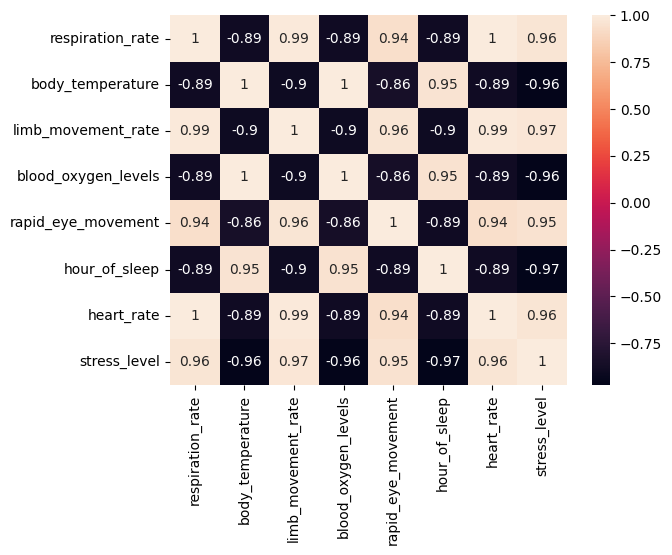

In [9]:
sns.heatmap(df.corr(),annot=True)
#We notice that the level of cardiac stress is very strongly correlated to all other factors.

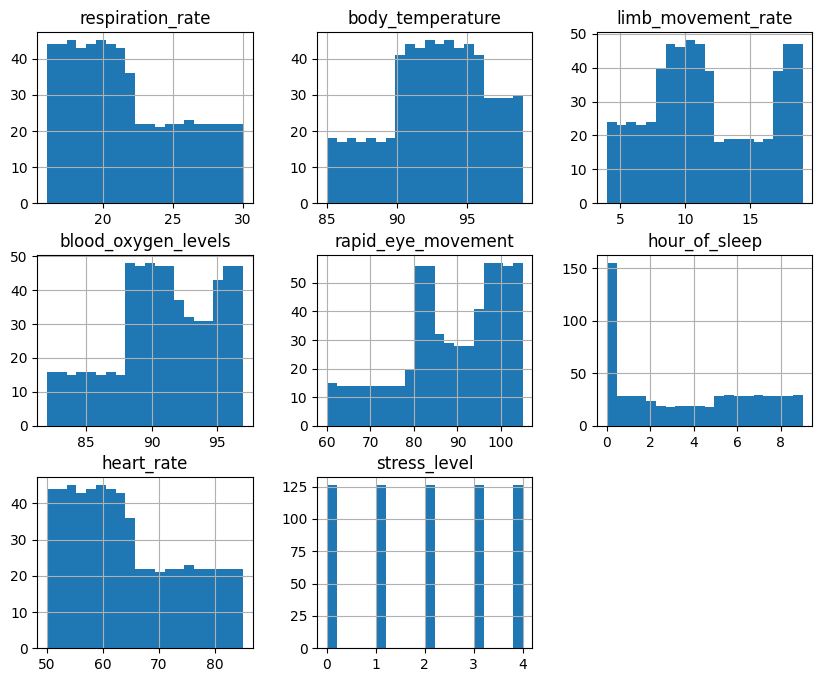

In [10]:
#Histograms to check the frequency and recurrence of values in the dataset
df.hist(bins=20, figsize=(10,8))
plt.xlabel('Valeurs')
plt.ylabel('Nombre de valeurs') #à compléter
plt.show()

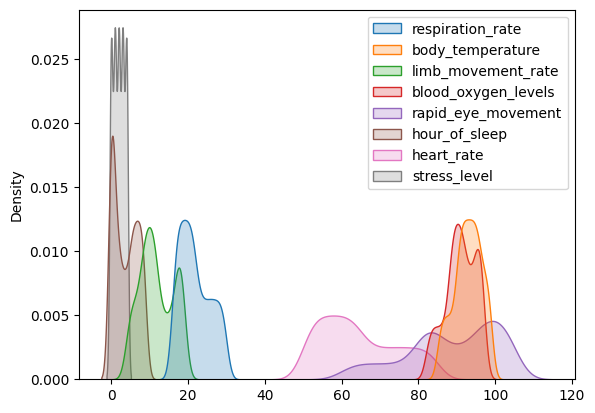

In [11]:
# The results of this graph allow us to see how each type of factor behaves. Are they all centered or do they look more like normal distributions etc. 
sns.kdeplot(data=df[['respiration_rate', 'body_temperature', 'limb_movement_rate',
       'blood_oxygen_levels', 'rapid_eye_movement', 'hour_of_sleep',
       'heart_rate', 'stress_level']], fill=True)
plt.show()

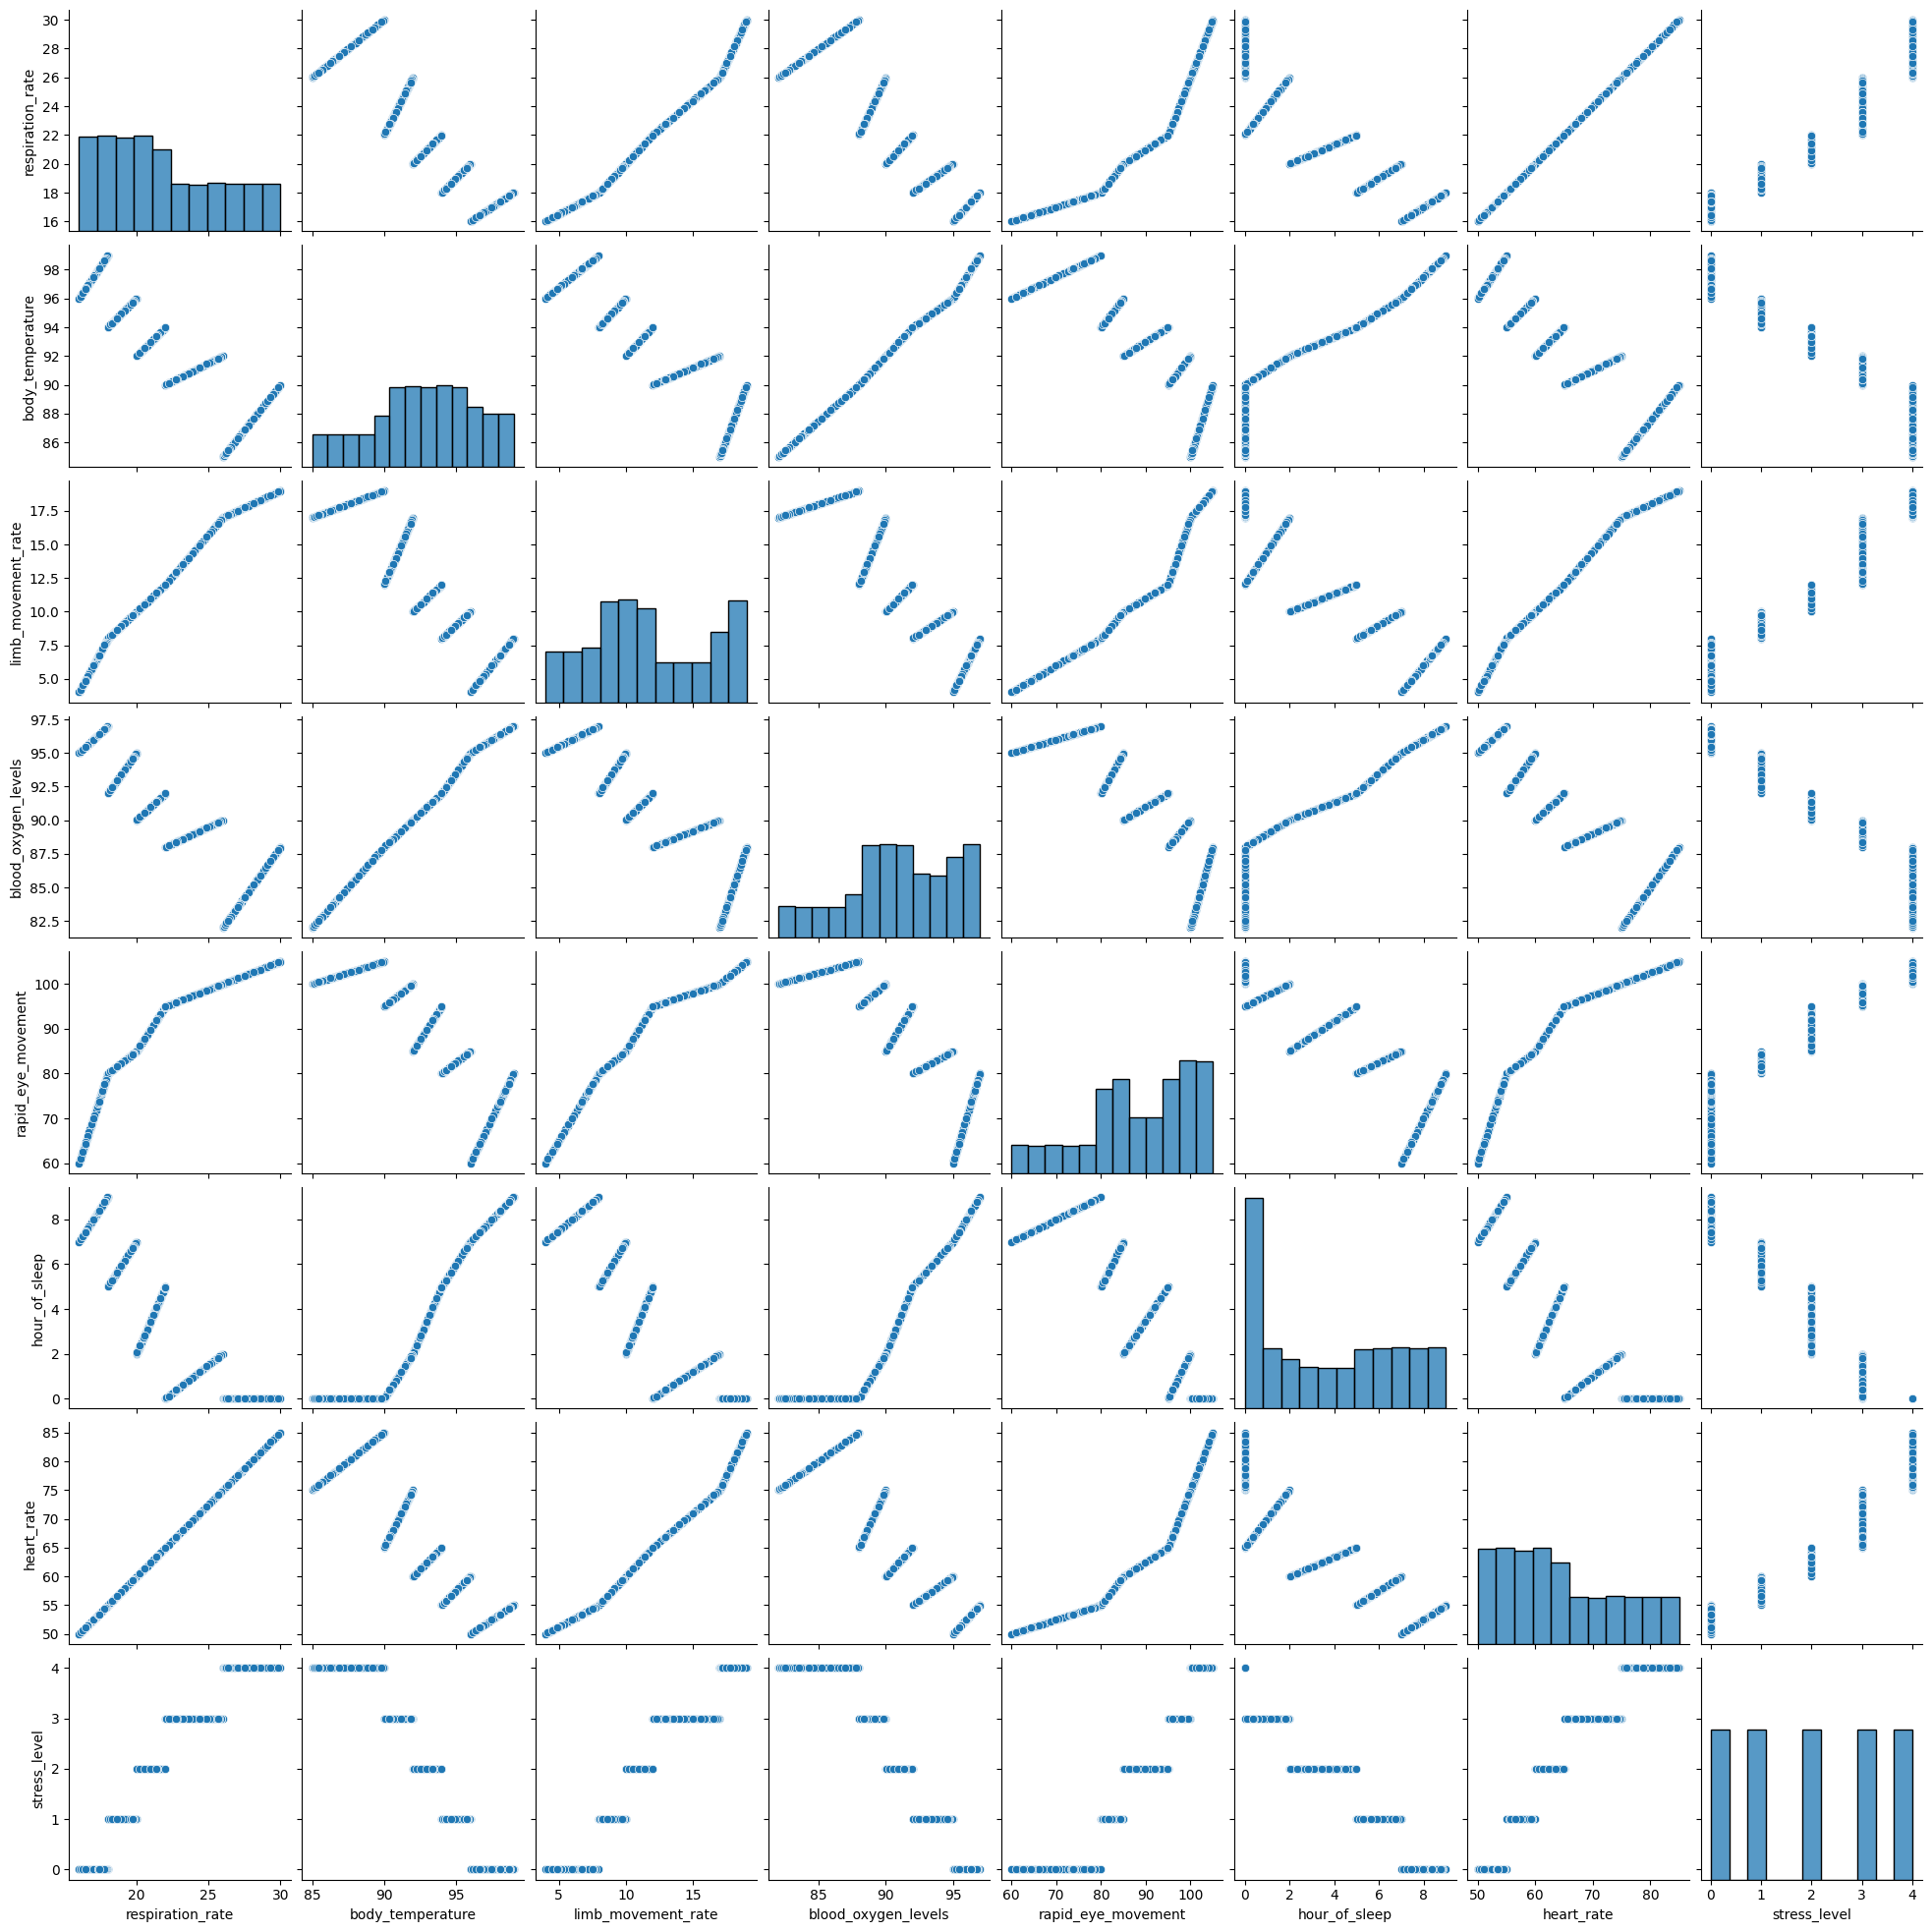

In [12]:
sns.pairplot( df)

In [13]:
X = df.drop("stress_level",axis=1)
y = df["stress_level"]

# Split the data into training and testing datasets (80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
X = df[['heart_rate']] # On considère seulement la variable 'heart_rate'
y = df['stress_level'] # La variable à prédire

# On essaie différentes valeurs de k (nombre de voisins)
k_values = [1, 3, 5, 7, 9]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5) 
    print(f"Validation accuracy (k={k}): {scores.mean()}")

# On choisit la meilleure valeur de k
best_k = 5

# On entraîne le modèle sur l'ensemble d'entraînement
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

Validation accuracy (k=1): 1.0
Validation accuracy (k=3): 1.0
Validation accuracy (k=5): 1.0
Validation accuracy (k=7): 1.0
Validation accuracy (k=9): 1.0


KNeighborsClassifier()

In [15]:
#Analyze the results and identify areas of improvement for the model.20%

In [16]:
#It seems that the KNN model is performing extremely well on the heart rate data, with perfect accuracy for all tested values of k. Let's try for another column.

In [24]:
X = df[['hour_of_sleep']] # On considère seulement la variable 'heart_rate'
y = df['stress_level'] # La variable à prédire

# On essaie différentes valeurs de k (nombre de voisins)
k_values = [1, 3, 5, 7, 9]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5) 
    print(f"Validation accuracy (k={k}): {scores.mean()}")

# On choisit la meilleure valeur de k
best_k = 5

# On entraîne le modèle sur l'ensemble d'entraînement
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Matrice de confusion : \n{conf_matrix}")


Validation accuracy (k=1): 1.0
Validation accuracy (k=3): 1.0
Validation accuracy (k=5): 1.0
Validation accuracy (k=7): 1.0
Validation accuracy (k=9): 1.0
Matrice de confusion : 
[[23  0  0  0  0]
 [ 0 24  0  0  0]
 [ 0  0 28  0  0]
 [ 0  0  0 26  0]
 [ 0  0  0  0 25]]


In [ ]:
#In this confusion matrix, we can see that there are no incorrect predictions for any class

In [18]:
#Perfect accuracy ! Seems like we have lab data, this is not a real life situation ! 

In [19]:
tree = DecisionTreeClassifier()

# Entraîner le modèle sur l'ensemble d'entraînement
tree.fit(X_train, y_train)

# Évaluer la précision du modèle sur l'ensemble de test
accuracy = tree.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 98.41%


In [20]:
#Knowing that with KNN model we have 100% accuracy, we just need to compare it to the accury obtained by using the DecisionTree model. 
print("Decision Tree accuracy: {:.2f}%".format(accuracy*100))
#The most reliable prediction model (in terms of accuracy) is therefore the KNN model

Decision Tree accuracy: 98.41%
